<a href="https://colab.research.google.com/github/Yamok00/Personal-repo/blob/main/Heart_using_smotetomek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data

data = pd.read_csv(r'https://raw.githubusercontent.com/Yamok00/GROUP-1-PROJECT/master/heart_disease_health_indicators_BRFSS2015.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.shape

(253680, 22)

In [5]:
# Check for missing values
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

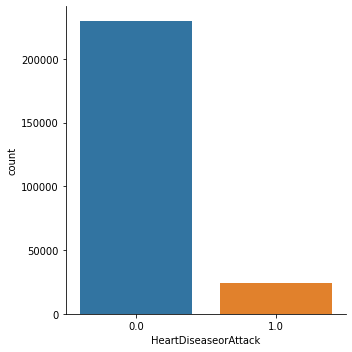

In [7]:
# Explore Target distribution 
sns.catplot(x="HeartDiseaseorAttack", kind="count", data=data);

Data Preprocessing

In [10]:
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

In [11]:
y.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Splitting Dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data['HeartDiseaseorAttack'], random_state=42)

In [14]:
# dealing with imbalanced data using SMOTETomek

In [15]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

y_resampled.value_counts

<bound method IndexOpsMixin.value_counts of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
367521    1.0
367522    1.0
367523    1.0
367524    1.0
367525    1.0
Name: HeartDiseaseorAttack, Length: 367526, dtype: float64>

In [16]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=42, max_iter=50000)

lgr.fit(X_resampled, y_resampled)

lgr_pred = lgr.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lgr_pred)

0.8453704344558594

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_resampled, y_resampled)

rfr_pred = rfr.predict(X_test)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rfr_pred)

0.7999142738772843